As we all know, language has a sequential nature, hence the order in which words appear in the text matters a lot. This feature allows us to understand the context of a sentence even if there are some words missing (or in case if stumble across a word which meaning is unknown). Consider example below:
    
    “Mary was scared because of the terrifying noise emitted by Chupacabra.”
    
    Without some previous context we have no idea what “Chupacabra” indeed is, but we probably can say that we would be not happy to encounter this creature in real life.

This dependency of words inside the sentence can give us some clues about the nature of the missing word and sometimes we do not even need to know the whole context. In the example above, by looking only at “noise emitted by” we on the intuitive level can say that the following word should be a noun and not some other part of speech.

This brings us up to the idea behind the N-Grams, where the formal definition is “a contiguous sequence of n items from a given sample of text”. The main idea is that given any text, we can split it into a list of unigrams (1-gram), bigrams (2-gram), trigrams (3-gram) etc.

For example:

Text: “I went running”

Unigrams: [(I), (went), (running)]

Bigrams: [(I, went), (went, running)]

In [ ]:
In a visual way:

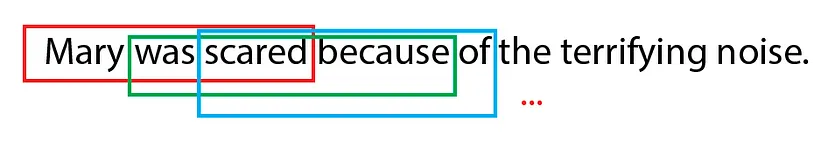

The main idea of generating text using N-Grams is to assume that the last word (x^{n} ) of the n-gram can be inferred from the other words that appear in the same n-gram (x^{n-1}, x^{n-2}, … x¹), which I call context.

So the main simplification of the model is that we do not need to keep track of the whole sentence in order to predict the next word, we just need to look back for n-1 tokens. Meaning that the main assumption is:
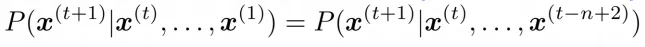

Great! And the most beautiful thing is that in order to calculate the probability above we just need to apply simple conditional probability rule

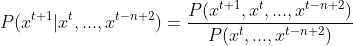

for example: using trigram model (n=3)

Text: “Mary was scared because of ___”

Since, we use a trigram model we drop the beginning of the sentence: “Mary was scared”, and we would need to only calculate only the possible continuation from “because of”. Assume from the dataset that we know that there are following possible continuations: “me”, “noise”. Therefore, we would need to compute:

P(noise | because of) and P(me| because of)

After the probabilities are computed, there exist multiple ways of selecting the final word given all candidates. One way would be to produce the word which had the highest conditional probability (this option might be not the best one as it tends to get stuck in a loop if n is small).

The other (and better) option would be to output the word ‘semi-randomly’ with regards to its conditional probability. So that the words that have a higher probability will have higher chances of being produced, while still other words with lower probability have a chance of being generated.

In [312]:
import random
import math
import string
import collections

unigram_model = dict()
frequencies_unigram = dict()
smoothed_unigram_model = dict()

bigram_model = dict()
frequencies_bigram = dict()
smoothed_bigram_model = dict()

In [313]:
folderPath = "cbt_test.txt"
#folderPath = "血色浪漫.txt"

In [326]:
# preprocessing of data such as removing punctiations, making every char lower etc.
def preprocess(folderPath, temp_list):
    count = 0                   #for changing size of train data. 
    with open(folderPath, "r") as f:
        for line in f.readlines():
            if(count == 30):      # you can change the number of lines which program reads from file
                 break
            
            line = line.translate(str.maketrans('', '', string.punctuation + string.digits))    #remove punctions and unnecessary digits
            temp_list.append(line.rstrip('\n').lower())                 #make them lower
            count += 1
    return temp_list

In [327]:
# starter function
# Input: Path of training file
# Output: Preprocessed sentences of training file with <s> and </s>
def dataset(folderPath):
    temp_list = list()
    temp_list = preprocess(folderPath, temp_list)
    return temp_list

#dataset(folderPath)

In [328]:
# simple sentences to words function
def sentences_to_words(sentences_list):
    temp_list = list()
    for sentence in sentences_list:
        sentence = sentence.split()
        for word in sentence:
            temp_list.append(word)
    return temp_list

#sentences_to_words(dataset(folderPath))

In [329]:
# for adding <s> and </s> to the sentences
def add_sentence_start_end(sentences_list):
    temp_list = list()
    for sentence in sentences_list:
        sentence = "<s>  " + sentence + " </s>"
        temp_list.append(sentence)
    return temp_list

In [330]:
# for finding frequencies of ngrams.
# Input: unigram n = 1, for bigram n = 2, for trigram n = 3.
# Output: returns dictionary
def find_frequencies(n):
    all_pairs = list()
    for sentence in sentences_list_with_start_end:
        words = sentence.split()
        pairs = zip(*[words[i:] for i in range(n)])             # creating pairs for Ngram
        all_pairs.append([" ".join(pair) for pair in pairs])
    frequencies_dict = dict()
    for pair in all_pairs:
        for pai in pair:
            if (pai in frequencies_dict):                   # If this pair is already exist in the dict: increase the value by +1
                newFrequency = frequencies_dict[pai] + 1
                frequencies_dict.update({pai: newFrequency})
            else:                                           # If this pair is not already exist in the dict: create and make its value 1
                frequencies_dict.update({pai: 1})
    return frequencies_dict

In [319]:
# Generating Ngrams
# Input: unigram n = 1, for bigram n = 2, for trigram n = 3.
# Output: Ngram models (ordered dictionary)
def NGram(n):
    if(n==1):   #unigram
        for word, count in frequencies_unigram.items():
            unigram_model[word] = count / sum(frequencies_unigram.values())
        sorted_y = sorted(unigram_model.items(), key=lambda kv: kv[1])
        sorted_model_unigram = collections.OrderedDict(sorted_y)
        return sorted_model_unigram

    if (n==2):
        for pair, count in frequencies_bigram.items():
            words = pair.split()
            bigram_model[pair] = count / frequencies_unigram[words[0]]
        sorted_z = sorted(bigram_model.items(), key=lambda kv: kv[1])
        sorted_model_bigram = collections.OrderedDict(sorted_z)
        return sorted_model_bigram


In [331]:
frequencies_unigram = dict()
frequencies_unigram = find_frequencies(1)
print(frequencies_unigram)
unigram_model = NGram(1)

{'<s>': 30, 'book': 3, 'title': 1, 'andrew': 1, 'lang': 1, 'the': 35, 'yellow': 2, 'fairy': 2, 'txt': 1, '</s>': 30, 'cat': 10, 'and': 14, 'mouse': 10, 'in': 10, 'partnership': 1, 'a': 10, 'had': 6, 'made': 1, 'acquaintance': 1, 'with': 3, 'spoken': 1, 'so': 2, 'much': 2, 'of': 10, 'great': 3, 'love': 1, 'friendship': 1, 'she': 6, 'felt': 1, 'for': 3, 'her': 3, 'that': 2, 'at': 4, 'last': 2, 'consented': 1, 'to': 12, 'live': 1, 'same': 1, 'house': 2, 'go': 3, 'shares': 1, 'housekeeping': 1, 'but': 4, 'we': 5, 'must': 2, 'provide': 1, 'winter': 1, 'or': 1, 'else': 1, 'shall': 1, 'suffer': 1, 'hunger': 1, 'said': 6, 'you': 7, 'little': 7, 'can': 1, 'not': 6, 'venture': 1, 'everywhere': 1, 'case': 1, 'run': 1, 'into': 1, 'trap': 1, 'this': 2, 'good': 2, 'counsel': 1, 'was': 7, 'followed': 1, 'pot': 4, 'fat': 3, 'bought': 1, 'they': 1, 'did': 1, 'know': 2, 'where': 2, 'put': 2, 'it': 16, 'length': 1, 'after': 2, 'long': 3, 'consultation': 1, 'i': 3, 'no': 3, 'place': 1, 'could': 1, 'be': 3

In [332]:
frequencies_bigram = find_frequencies(2)
bigram_model = NGram(2)
print(frequencies_bigram)


{'<s> book': 1, 'book title': 1, 'title andrew': 1, 'andrew lang': 1, 'lang the': 1, 'the yellow': 2, 'yellow fairy': 2, 'fairy book': 2, 'book txt': 1, 'txt </s>': 1, '<s> the': 2, 'book the': 1, 'the cat': 9, 'cat and': 1, 'and the': 1, 'the mouse': 7, 'mouse in': 1, 'in partnership': 1, 'partnership a': 1, 'a cat': 1, 'cat had': 3, 'had made': 1, 'made acquaintance': 1, 'acquaintance with': 1, 'with a': 1, 'a mouse': 1, 'mouse and': 2, 'and had': 2, 'had spoken': 1, 'spoken so': 1, 'so much': 1, 'much of': 1, 'of the': 5, 'the great': 1, 'great love': 1, 'love and': 1, 'and friendship': 1, 'friendship she': 1, 'she felt': 1, 'felt for': 1, 'for her': 1, 'her that': 1, 'that at': 1, 'at last': 2, 'last the': 1, 'mouse consented': 1, 'consented to': 1, 'to live': 1, 'live in': 1, 'in the': 4, 'the same': 1, 'same house': 1, 'house with': 1, 'with her': 1, 'her and': 1, 'and to': 1, 'to go': 1, 'go shares': 1, 'shares in': 1, 'the housekeeping': 1, 'housekeeping </s>': 1, '<s> but': 3,

In [333]:
# For generating the next word randomly according to model
# Input: Dictionary (model which is looking forward to next word)
# Output: String (generated next word)
def next(dict):
    total = 0
    for key, value in dict.items():
        total += float(value)
    random_probability = random.uniform(0, total)       # create random number
    print(random_probability)
    temp = 0
    for word, probability in dict.items():
        print(word)
        if temp + float(probability) > random_probability: # When you reach the random number take the word.
            return word
        temp += float(probability)              # else keep looking for word.


In [323]:
# For generating sentences.
# Input: Length = number of words in the one sentence. Count = number of sentences. N = Ngram model
# Output: String Array (Generated sentences)
def generate(length, count, n):
    if(n==1):
        sentences_list = list()
        for j in range(count):      # number of sentence
            sentence_list = list()
            for i in range(length): # number of words in the one sentence
                generated_word = next(unigram_model)
                if (generated_word == "<s>" or generated_word == "<s></s>"):    # If generated word is start or end token ignore and create new one
                    while (generated_word == "<s>" or generated_word == "<s></s>"):
                        generated_word = next(unigram_model)
                if (generated_word == "</s>"):      # If generated word is end token
                    if (len(sentence_list) == 0):   # If the first generated word is end token then create new sentence
                        return generate(length, count, n)
                    else:                           # If the generated end token is not the first word then finish the sentence.
                        break
                sentence_list.append(generated_word)
            sentence_list[0] = sentence_list[0].capitalize()            # Make the first char of sentence capitalize.
            sentence = ' '.join(sentence_list)
            sentence += "."                                             # Add dot to the end of the sentence
            sentences_list.append(sentence)
        return sentences_list

    if(n==2):
        sentences_list = list()
        for j in range(count):          # number of sentence
            sentence_list = list()
            current_word = "<s>"        # starting with start token <s>
            next_word = ""
            for i in range(length):     # number of words in the one sentence
                temp_dict = dict()
                for key, value in bigram_model.items():
                    if (key.split()[0] == current_word):        # take the possible next words according to the current word
                        temp_dict.update({key.split()[1]: value})
                next_word = next(temp_dict)
                if (next_word == "</s>"):                   # If the next word is end token then finish the sentence.
                    break
                sentence_list.append(next_word)
                current_word = next_word
            sentence_list[0] = sentence_list[0].capitalize()
            sentence = ' '.join(sentence_list)
            sentence += "."
            sentences_list.append(sentence)
        return sentences_list

In [334]:

sentences_list = list()
sentences_list = dataset(folderPath)

sentences_list_with_start_end = list()
sentences_list_with_start_end = add_sentence_start_end(sentences_list)

all_words_list = list()
all_words_list = sentences_to_words(sentences_list_with_start_end)

In [335]:
frequencies_bigram = find_frequencies(2)
bigram_model = NGram(2)
#print(frequencies_bigram)


In [336]:
generated_sentences_unigram = generate(15, 1, 1)


0.7655955371768017
title
andrew
lang
txt
partnership
made
acquaintance
spoken
love
friendship
felt
consented
live
same
shares
housekeeping
provide
winter
or
else
shall
suffer
hunger
can
venture
everywhere
case
run
into
trap
counsel
followed
bought
they
did
length
consultation
place
could
better
one
trouble
away
from
hide
corner
wo
nt
touch
till
want
placed
safety
before
wanted
tell
my
has
son
white
brown
spots
wants
let
today
do
care
alone
yes
replied
when
eat
anything
think
should
like
drop
red
christening
wine
all
untrue
been
straight
slunk
began
lick
then
took
walk
on
roofs
town
looked
view
stretched
herself
sun
lips
whenever
thought
soon
evening
home
ah
here
have
an
enjoyable
day
well
answered
child
s
drily
topoff
echoed
indeed
wonderful
curious
family
odd
about
worse
breadthief
godchild
called
another
came
over
much
house
must
this
good
after
than
church
take
there
are
longing
cousin
godmother
yellow
fairy
so
that
last
know
where
put
will
out
certainly
very
asked
licked
top
again


In [337]:
generated_sentences_unigram

['And wo is winter a.']

In [ ]:
generated_sentences_bigram = generate(15, 3, 2)
generated_sentences_bigram

In [ ]:
frequencies_trigram = find_frequencies(3)

frequencies_trigram

In [ ]:
def TGram():
    for pair, count in frequencies_trigram.items():
        #print(pair,count)
        words = pair.split()
        bigram_pair = words[0] + " " + words[1]
        trigram_model[pair] = count / frequencies_bigram[bigram_pair]
    sorted_z = sorted(trigram_model.items(), key=lambda kv: kv[1])
    sorted_model_trigram = collections.OrderedDict(sorted_z)
    return sorted_model_trigram

In [ ]:
trigram_model = dict()
trigram_model= TGram()

In [ ]:
def generate3(length,count,n):
        sentences_list = list()
        for j in range(count):
            sentence_list = list()
            first_word = "<s>"
            middle_word = ""
            next_word = ""
            bool_flag = True
            for i in range(length):
                temp_dict = dict()
                if (first_word == "<s>" and bool_flag):     # for creating the first sentence of trigram, I look for the bigram
                    for key, value in bigram_model.items():
                        if (key.split()[0] == first_word):
                            temp_dict.update({key.split()[1]: value})
                    next_word = next(temp_dict)
                    middle_word = next_word
                    bool_flag = False
                    if (next_word == "</s>"):
                        break
                else:
                    for key, value in trigram_model.items():
                        if (key.split()[0] == first_word and key.split()[1] == middle_word):
                            temp_dict.update({key.split()[2]: value})
                    first_word = middle_word
                    next_word = next(temp_dict)
                    middle_word = next_word
                    if (next_word == "</s>"):
                        break
                sentence_list.append(next_word)
            sentence_list[0] = sentence_list[0].capitalize()
            sentence = ' '.join(sentence_list)
            sentence += "."
            sentences_list.append(sentence)
        return sentences_list    

In [ ]:
generate3(15,3,3)